In [1]:
import yfinance as yf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression

In [3]:
df=yf.download('AMD', start='2015-01-01')

[*********************100%%**********************]  1 of 1 completed


In [4]:
df['returns']=np.log(df.Close.pct_change()+1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2191 entries, 2015-01-02 to 2023-09-15
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2191 non-null   float64
 1   High       2191 non-null   float64
 2   Low        2191 non-null   float64
 3   Close      2191 non-null   float64
 4   Adj Close  2191 non-null   float64
 5   Volume     2191 non-null   int64  
 6   returns    2190 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 136.9 KB


In [6]:
def lagit(df, lags):
  names=[]
  for i in range(1,lags+1):
    df['Lag_' +str(i)]=df['returns'].shift(i)
    names.append('Lag_'+str(i))

  return names


In [7]:
Lagnames=lagit(df, 5)

In [8]:
Lagnames

['Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5']

In [9]:
df.dropna(inplace=True)

In [10]:
model=LinearRegression()

In [11]:
model.fit(df[Lagnames],df['returns'])

LinearRegression()

In [12]:
df['prediction_LR']=model.predict(df[Lagnames])

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train, test=train_test_split(df, shuffle=False,test_size=0.3, random_state=0)

In [15]:
model=LinearRegression()

In [16]:
model.fit(train[Lagnames], train['returns'])

LinearRegression()

In [17]:
test['prediction_LR']=model.predict(test[Lagnames])

In [18]:
test['direction_LR']=[1 if i > 0 else -1 for i in test.prediction_LR]

In [19]:
test['Strat_LR']=test['direction_LR']*test['returns']

In [20]:
np.exp(test[['returns', 'Strat_LR']].sum())

returns     1.213912
Strat_LR    0.398503
dtype: float64

<Axes: xlabel='Date'>

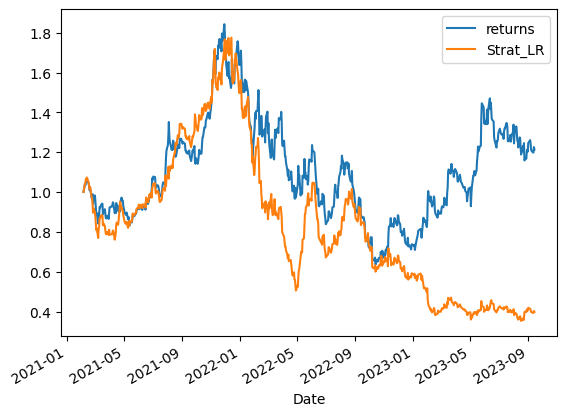

In [21]:
np.exp(test[['returns', 'Strat_LR']].cumsum()).plot()

In [22]:
(test['direction_LR'].diff() !=0).value_counts()

False    389
True     267
Name: direction_LR, dtype: int64